# Exp-4: Compare the Performance of various Optimization techniques of Momentum Based GD, Stochastic GD, Adam.

In [ ]:
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
X_train, X_test = X_train / 255., X_test / 255.

In [ ]:
accuracy_data = {}

In [ ]:
def newModel(optim):
  model = Sequential([
      Flatten(input_shape=(28, 28)),
      Dense(128, activation='relu'),
      Dropout(.2),
      Dense(64, activation='relu'),
      Dropout(.2),
      Dense(10),
  ])
  model.compile(optimizer=optim, loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  return model

In [ ]:
optims = dict(
    sgd=SGD(learning_rate=.01),
    momentum=SGD(learning_rate=.01, momentum=.9),
    nesterov=SGD(learning_rate=.01, momentum=.9, nesterov=True),
    adagrad=Adagrad(learning_rate=.01),
    rms=RMSprop(learning_rate=.01),
    adam=Adam(learning_rate=.01)
)

for name, optim in optims.items():
  history = newModel(optim).fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
  accuracy_data[name] = history.history['accuracy']

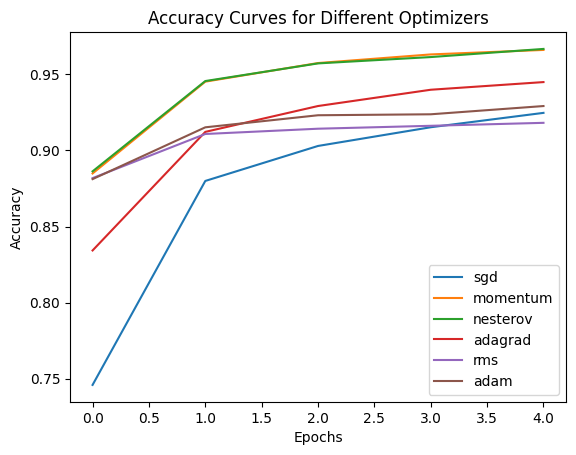

In [ ]:
for name, points in accuracy_data.items():
  plt.plot(points, label=name)

plt.title('Accuracy Curves for Different Optimizers')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()